# Test cobalt package for balanced dgp

In [1]:
library(ggplot2)
library(gridExtra)

library(cobalt)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
 cobalt (Version 4.5.5, Build Date: 2024-04-02)



## Data

In [2]:
# load data from csv
dgp_name <- "unbalanced"

df_train <- read.csv(paste0("../dgps/data/", dgp_name, "_train.csv"))
df_test <- read.csv(paste0("../dgps/data/", dgp_name, "_test.csv"))

print(paste0("percentage of treated in train set: ", mean(df_train$D)))
print(paste0("percentage of treated in test set: ", mean(df_test$D)))

head(df_train)

[1] "percentage of treated in train set: 0.046"


[1] "percentage of treated in test set: 0.06"


,X1,X2,X3,D,Y,m_oracle,m_hat,m_calibrated,m_oracle_ate_weights,m_oracle_att_weights,m_hat_ate_weights,m_hat_att_weights,m_calibrated_ate_weights,m_calibrated_att_weights
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3840654,0.7184539,1,0,4.088134,0.0307592268,0.0311390782,0.01212121,1.031735,0.0317353826,1.032140,0.0321398846,1.012270,1.226994e-02
2,-0.2191005,0.2475598,1,0,3.736979,0.0149827321,0.0135293396,0.01212121,1.015211,0.0152106289,1.013715,0.0137148931,1.012270,1.226994e-02
3,-1.5255252,0.6590454,0,0,-0.439215,0.0004480777,0.0003412602,0.00000000,1.000448,0.0004482786,1.000341,0.0003413767,1.000000,1.000000e-12
4,0.6408429,0.1549253,0,0,3.657675,0.0534923911,0.0396850072,0.01212121,1.056516,0.0565155426,1.041325,0.0413249897,1.012270,1.226994e-02
5,0.5629692,0.4830397,1,0,4.209506,0.0543154046,0.0527396266,0.01212121,1.057435,0.0574350104,1.055676,0.0556759557,1.012270,1.226994e-02
6,1.8767958,0.4276013,1,1,8.322237,0.4566070104,0.4557294503,0.46153846,2.190067,1.0000000000,2.194284,1.0000000000,2.166667,1.000000e+00


## ATE

### Balance Tables

In [3]:
formula <- as.formula("D ~ X1 + X2 + X3")
sd_denom = "weighted"

In [4]:
bal_table_train <- bal.tab(
    x=formula,
    treat="D",
    data=df_train,
    weights="m_oracle_ate_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_test <- bal.tab(
    x=formula,
    treat="D",
    data=df_test,
    weights="m_oracle_ate_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_train
bal_table_test

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5436   0.6594
X2 Contin. -0.1794   0.1090
X3  Binary  0.0989   0.0580
Y  Contin.  2.0828   1.4009

Effective sample sizes
           Control Treated
Unadjusted  954.     46.  
Adjusted    937.05   12.12

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.6255   0.1444
X2 Contin. -0.2606  -0.4282
X3  Binary -0.0472  -0.0994
Y  Contin.  2.2359   1.2809

Effective sample sizes
           Control Treated
Unadjusted   940.    60.  
Adjusted     899.4    8.66

### Love Plots

In [5]:

ate_plots_train <- list()
ate_plots_test <- list()

for (i in seq_along(c("m_oracle_ate_weights", "m_hat_ate_weights", "m_calibrated_ate_weights"))) {

    weights <- c("m_oracle_ate_weights", "m_hat_ate_weights", "m_calibrated_ate_weights")[i]

    bal_table_train <- bal.tab(
        x=formula,
        treat="D",
        data=df_train,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    bal_table_test <- bal.tab(
        x=formula,
        treat="D",
        data=df_test,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    print(bal_table_train)
    print(bal_table_test)

    p_train <- love.plot(bal_table_train, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Train - ", weights))
    
    p_test <- love.plot(bal_table_test, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Test - ", weights))

    ate_plots_train[[i]] <- p_train
    ate_plots_test[[i]] <- p_test
}

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5436   0.6594
X2 Contin. -0.1794   0.1090
X3  Binary  0.0989   0.0580
Y  Contin.  2.0828   1.4009

Effective sample sizes
           Control Treated
Unadjusted  954.     46.  
Adjusted    937.05   12.12
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.6255   0.1444
X2 Contin. -0.2606  -0.4282
X3  Binary -0.0472  -0.0994
Y  Contin.  2.2359   1.2809

Effective sample sizes
           Control Treated
Unadjusted   940.    60.  
Adjusted     899.4    8.66
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5666   0.6707
X2 Contin. -0.1788   0.0832
X3  Binary  0.0989   0.0209
Y  Contin.  2.0779   1.3845

Effective sample sizes
           Control Treated
Unadjusted  954.     46.  
Adjusted    941.22   11.82
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.6556   0.1198
X2 Contin. -0.2630  -0.4812
X3  Binary -0.0472  -0.1358
Y  Contin.  2.2901   1.2835

Effective sample sizes
           Control Treated
Unadju

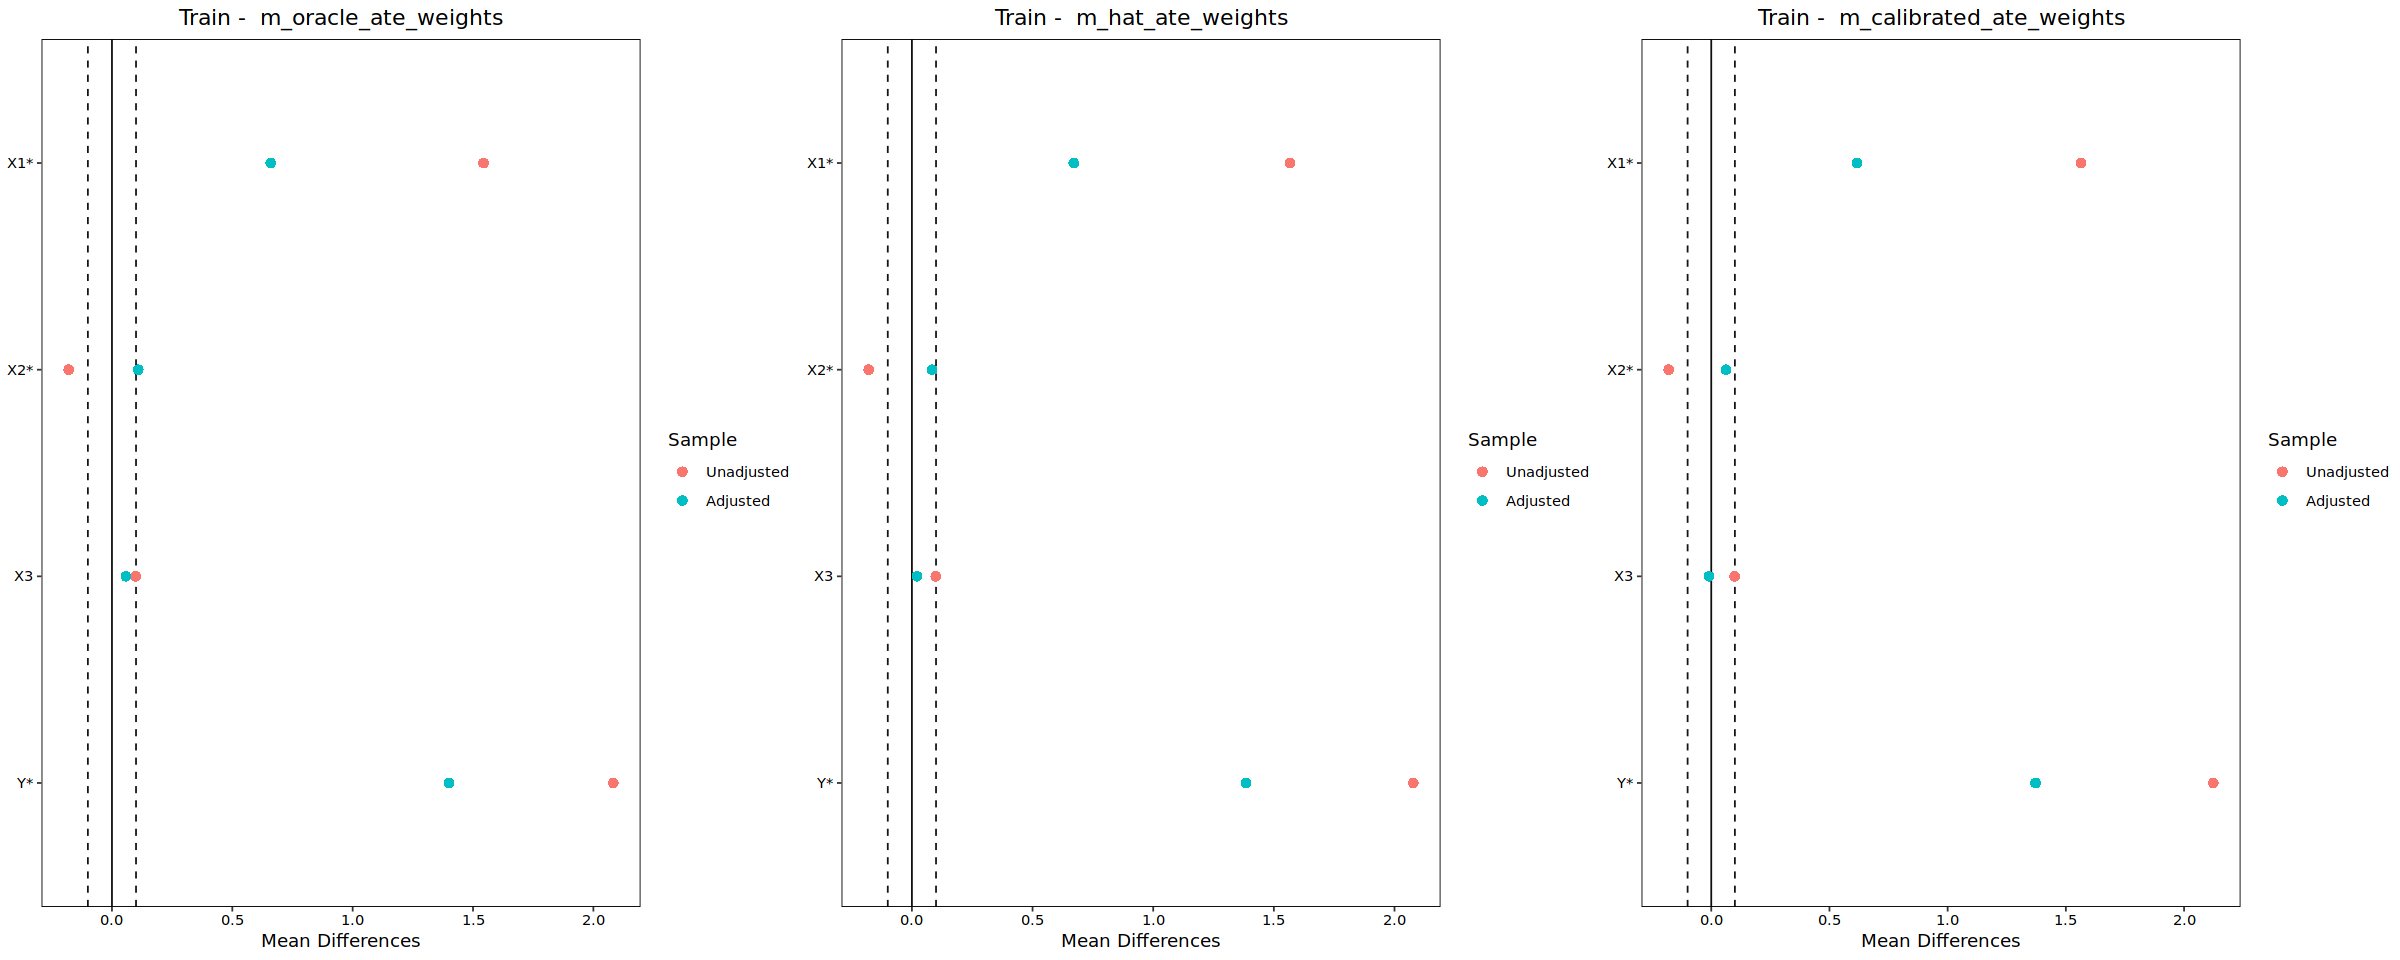

In [6]:
options(repr.plot.width = 20, repr.plot.height = 8)
grid.arrange(grobs = ate_plots_train, nrow = 1, ncol = 3)

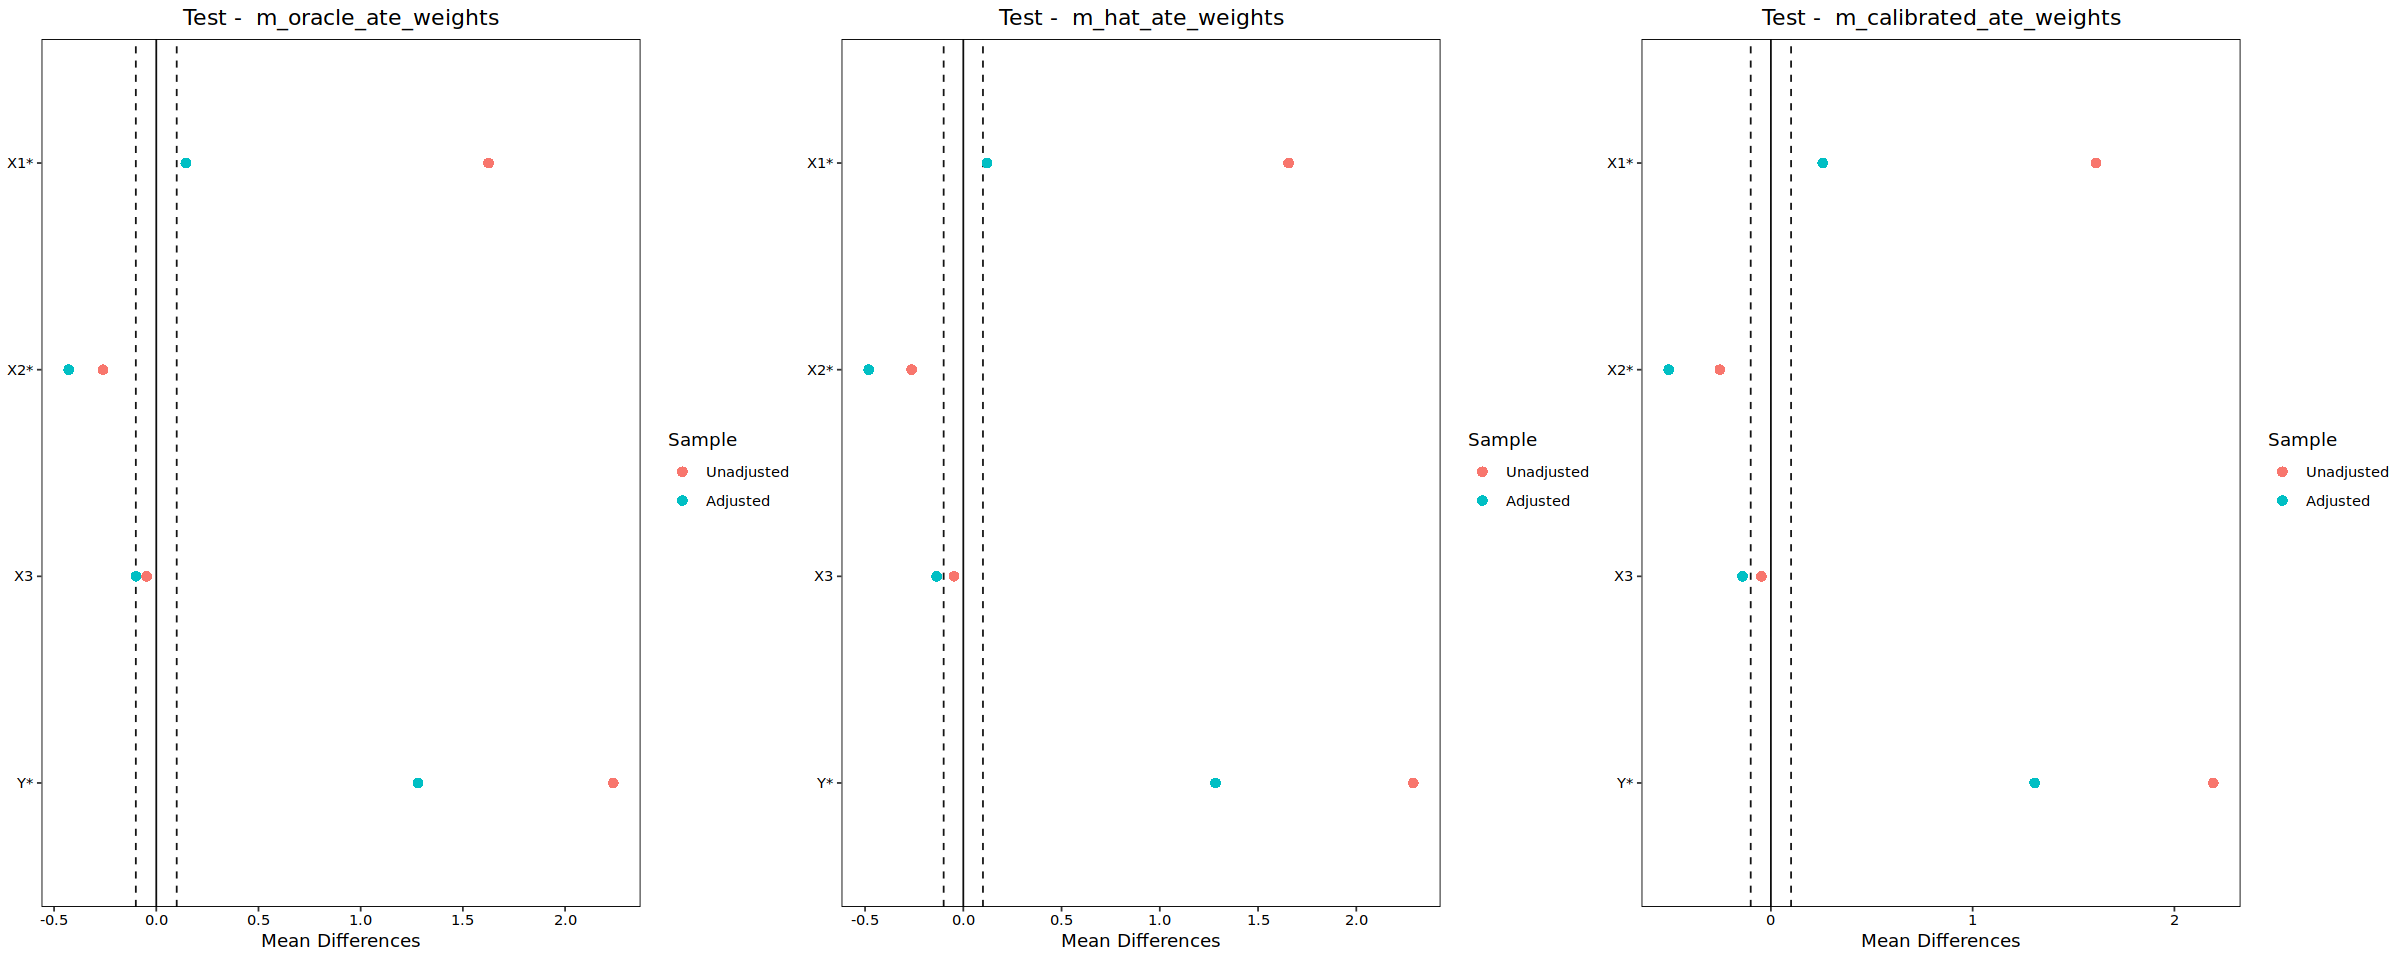

In [7]:
options(repr.plot.width = 20, repr.plot.height = 8)
grid.arrange(grobs = ate_plots_test, nrow = 1, ncol = 3)

## ATT

### Balance Tables

In [8]:
formula <- as.formula("D ~ X1 + X2 + X3")
sd_denom = "weighted"

In [9]:
bal_table_train <- bal.tab(
    x=formula,
    treat="D",
    data=df_train,
    weights="m_oracle_att_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_test <- bal.tab(
    x=formula,
    treat="D",
    data=df_test,
    weights="m_oracle_att_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_train
bal_table_test

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  2.1664   0.0398
X2 Contin. -0.1740  -0.0809
X3  Binary  0.0989   0.1011
Y  Contin.  2.6604   1.3559

Effective sample sizes
           Control Treated
Unadjusted  954.        46
Adjusted    127.83      46

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.7844  -0.0244
X2 Contin. -0.2426  -0.1735
X3  Binary -0.0472  -0.1569
Y  Contin.  2.4542   1.1195

Effective sample sizes
           Control Treated
Unadjusted  940.        60
Adjusted     76.91      60

### Love Plots

In [10]:
att_plots_train <- list()
att_plots_test <- list()

for (i in seq_along(c("m_oracle_att_weights", "m_hat_att_weights", "m_calibrated_att_weights"))) {

    weights <- c("m_oracle_att_weights", "m_hat_att_weights", "m_calibrated_att_weights")[i]

    bal_table_train <- bal.tab(
        x=formula,
        treat="D",
        data=df_train,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    bal_table_test <- bal.tab(
        x=formula,
        treat="D",
        data=df_test,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    print(bal_table_train)
    print(bal_table_test)

    p_train <- love.plot(bal_table_train, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Train - ", weights))
    
    p_test <- love.plot(bal_table_test, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Test - ", weights))

    att_plots_train[[i]] <- p_train
    att_plots_test[[i]] <- p_test
}

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  2.1664   0.0398
X2 Contin. -0.1740  -0.0809
X3  Binary  0.0989   0.1011
Y  Contin.  2.6604   1.3559

Effective sample sizes
           Control Treated
Unadjusted  954.        46
Adjusted    127.83      46
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.7844  -0.0244
X2 Contin. -0.2426  -0.1735
X3  Binary -0.0472  -0.1569
Y  Contin.  2.4542   1.1195

Effective sample sizes
           Control Treated
Unadjusted  940.        60
Adjusted     76.91      60
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  2.1902   0.0377
X2 Contin. -0.1737  -0.1362
X3  Binary  0.0989   0.0611
Y  Contin.  2.6687   1.3498

Effective sample sizes
           Control Treated
Unadjusted  954.        46
Adjusted    126.62      46
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.7765  -0.0640
X2 Contin. -0.2420  -0.2248
X3  Binary -0.0472  -0.2086
Y  Contin.  2.4732   1.0942

Effective sample sizes
           Control Treated
Unadju

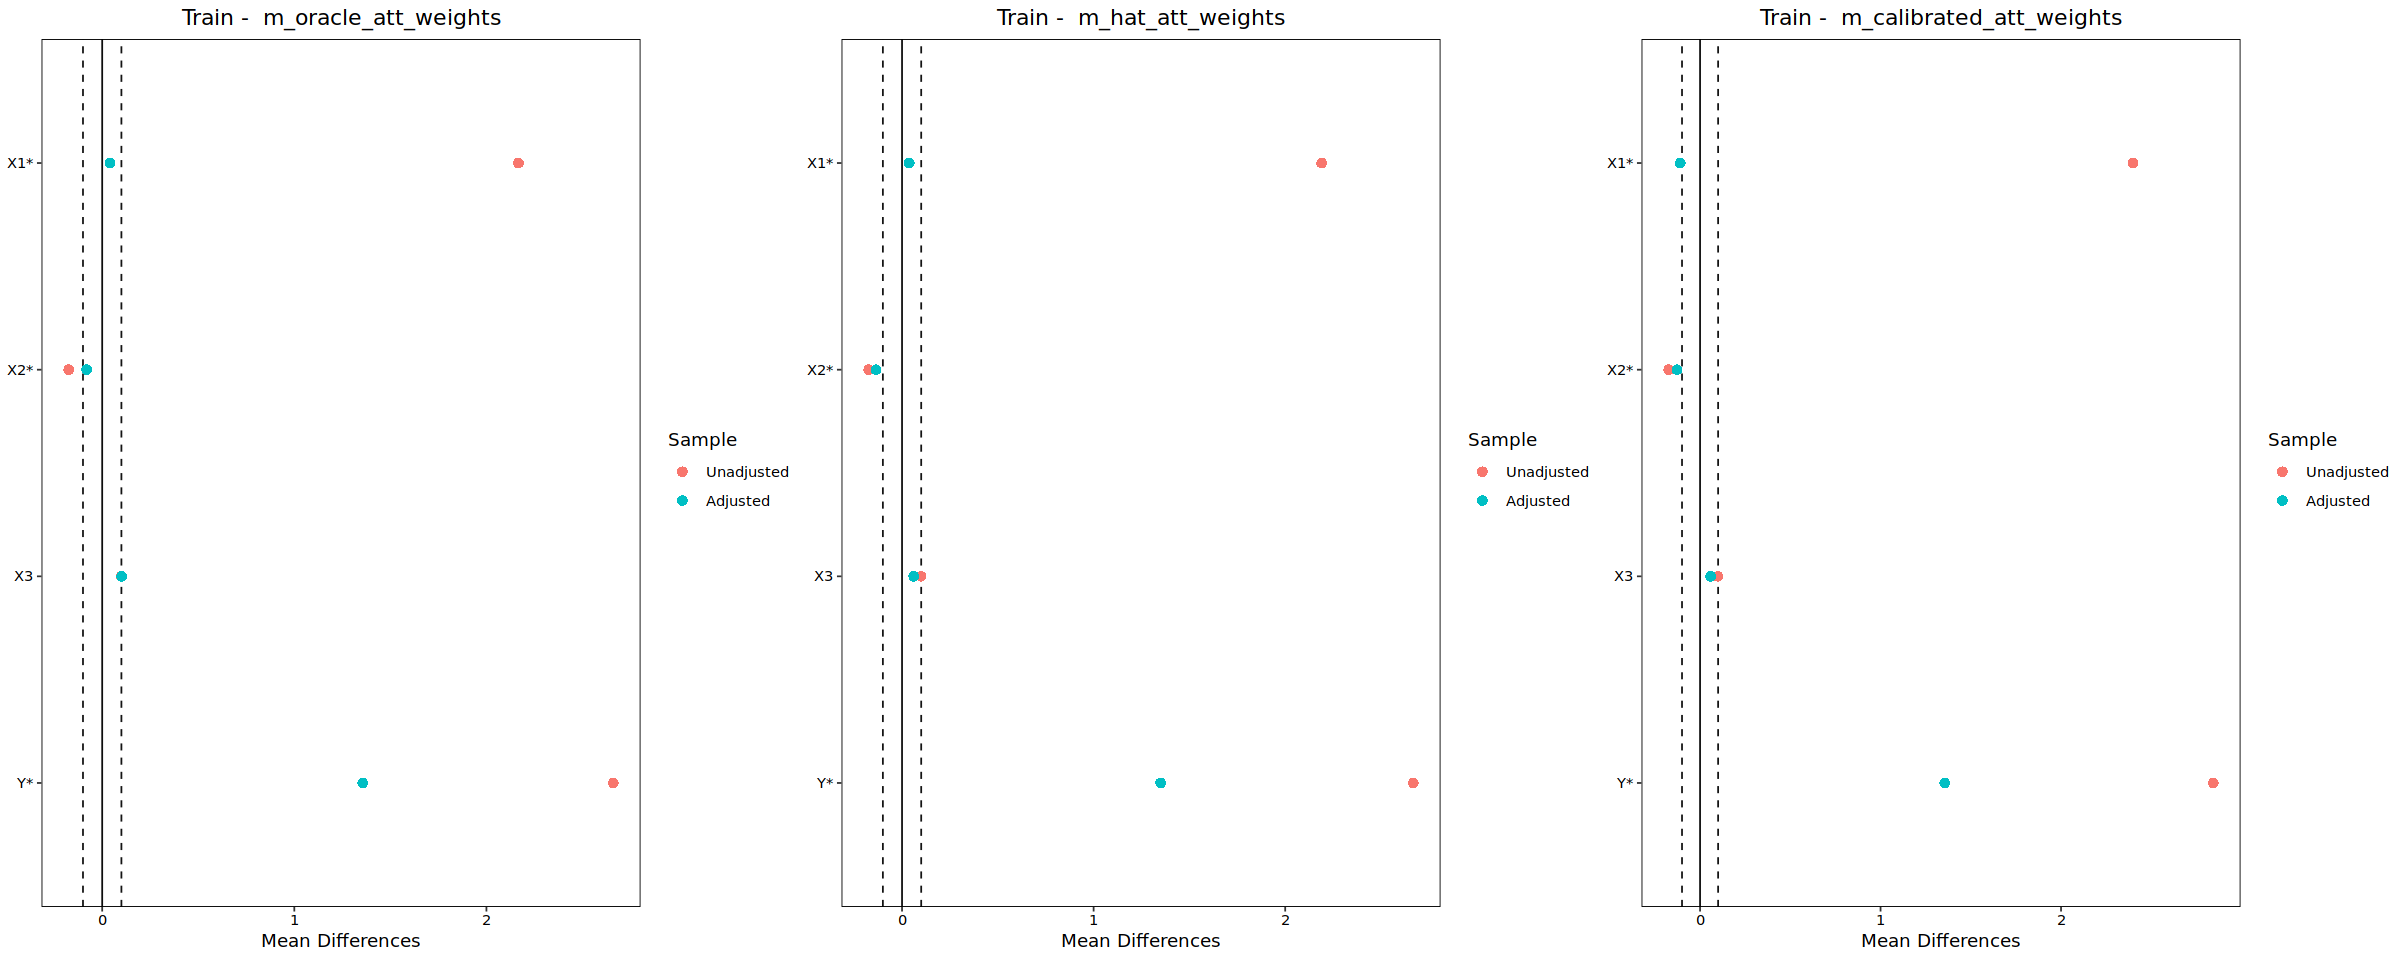

In [11]:
options(repr.plot.width = 20, repr.plot.height = 8)
grid.arrange(grobs = att_plots_train, nrow = 1, ncol = 3)